In [1]:
import pandas as pd
import numpy as np

healthInsurance = pd.read_csv('healthInsurance.csv')

In [2]:
healthInsurance = healthInsurance.drop(['Unnamed: 0'], axis=1)
healthInsurance

,Age,Tobacco,IndividualRate,IndividualTobaccoRate,IssuerId,BenefitName,IsCovered,IsEHB,QuantLimitOnSvc,IsExclFromInnMOOP,IsExclFromOonMOOP,MetalLevel,DentalOnlyPlan,MarketCoverage,StateCode
0,0-14,No Preference,53.00,NaN,21989,Routine Dental Services (Adult),Covered,NaN,Yes,No,No,High,Yes,SHOP (Small Group),AK
1,0-14,No Preference,53.00,NaN,21989,Routine Dental Services (Adult),Covered,NaN,Yes,No,No,Low,Yes,Individual,AK
2,0-14,No Preference,53.00,NaN,21989,Routine Dental Services (Adult),Covered,NaN,Yes,No,No,Low,Yes,Individual,AK
3,0-14,No Preference,53.00,NaN,21989,Routine Dental Services (Adult),Covered,NaN,Yes,No,No,High,Yes,SHOP (Small Group),AK
4,0-14,No Preference,53.00,NaN,21989,Routine Dental Services (Adult),Covered,NaN,Yes,No,No,High,Yes,SHOP (Small Group),AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008707,21,No Preference,511.55,NaN,53613,Major Dental Care - Adult,Covered,NaN,No,Yes,Yes,Low,Yes,Individual,AZ
1008708,21,No Preference,511.55,NaN,53613,Major Dental Care - Adult,Covered,NaN,No,Yes,Yes,Low,Yes,Individual,AZ
1008709,22,No Preference,511.55,NaN,53613,Accidental Dental,Not Covered,NaN,NaN,NaN,NaN,High,Yes,Individual,AZ
1008710,22,No Preference,511.55,NaN,53613,Accidental Dental,Not Covered,NaN,NaN,NaN,NaN,Low,Yes,Individual,AZ


In [3]:
#healthInsurance.IsEHB.isnull().sum()
healthInsurance.IsEHB.sample(5)

800796    Yes
37964     NaN
682463    Yes
387298    Yes
930938    NaN
Name: IsEHB, dtype: object

In [4]:
data = [healthInsurance]
isEHB = {'Yes':1, 'No':0}

for dataset in data:
    # fill NaN values with No
    dataset['IsEHB'] = dataset['IsEHB'].fillna('No')
    # convert titles into numbers
    dataset['IsEHB'] = dataset['IsEHB'].map(isEHB)

In [5]:
# there are no nulls in IsEHB column
healthInsurance.IsEHB.isnull().sum()

0

In [6]:
healthInsurance.IsCovered.sample(20)

953266    Covered
773872    Covered
517209        NaN
887581    Covered
630805    Covered
989250    Covered
858748    Covered
229732        NaN
2695      Covered
116583    Covered
70029     Covered
359598    Covered
259330    Covered
927555    Covered
362510    Covered
667143        NaN
653651    Covered
931951    Covered
168912    Covered
246796    Covered
Name: IsCovered, dtype: object

In [7]:
data = [healthInsurance]
isCovered = {'Covered':1, 'Not Covered':0}

for dataset in data:
    # fill NaN values with No
    dataset['IsCovered'] = dataset['IsCovered'].fillna('Not Covered')
    # convert titles into numbers
    dataset['IsCovered'] = dataset['IsCovered'].map(isCovered)

In [8]:
healthInsurance.groupby(['Tobacco']).count()

,Age,IndividualRate,IndividualTobaccoRate,IssuerId,BenefitName,IsCovered,IsEHB,QuantLimitOnSvc,IsExclFromInnMOOP,IsExclFromOonMOOP,MetalLevel,DentalOnlyPlan,MarketCoverage,StateCode
Tobacco,,,,,,,,,,,,,,
No Preference,965910,965910,0,965910,965910,965910,965910,276432,791008,791008,965910,965910,965910,965910
Tobacco User/Non-Tobacco User,38220,38220,38220,38220,38220,38220,38220,6478,31018,31018,38220,38220,38220,38220


In [9]:
data = [healthInsurance]
tobacco = {'Tobacco User/Non-Tobacco User':1, 'No Preference':0}

for dataset in data:
    # fill NaN values with No Preference. No preference daha fazlaydı
    dataset['Tobacco'] = dataset['Tobacco'].fillna('No Preference')
    # convert titles into numbers
    dataset['Tobacco'] = dataset['Tobacco'].map(tobacco)

In [11]:
healthInsurance.DentalOnlyPlan.isnull().sum()

0

In [12]:
data = [healthInsurance]
dentalOnly = {'Yes':1, 'No':0}

for dataset in data:
    # convert titles into numbers
    dataset['DentalOnlyPlan'] = dataset['DentalOnlyPlan'].map(dentalOnly)

In [13]:
healthInsurance.MarketCoverage.isnull().sum()

0

In [14]:
data = [healthInsurance]
coverage = {'SHOP (Small Group)':1, 'Individual':0}

for dataset in data:
    # convert titles into numbers
    dataset['MarketCoverage'] = dataset['MarketCoverage'].map(coverage)

In [15]:
healthInsurance.QuantLimitOnSvc.sample(10)

740262    NaN
416611     No
973986    NaN
471550    NaN
731654    NaN
269743    Yes
206767    NaN
320726     No
570845    NaN
975563    NaN
Name: QuantLimitOnSvc, dtype: object

In [16]:
data = [healthInsurance]
quantLimit = {'Yes':1, 'No':0}

for dataset in data:
    # fill NaN values with No
    dataset['QuantLimitOnSvc'] = dataset['QuantLimitOnSvc'].fillna('No')
    # convert titles into numbers
    dataset['QuantLimitOnSvc'] = dataset['QuantLimitOnSvc'].map(quantLimit)

In [17]:
data = [healthInsurance]
metalLevel = {'Medical':1, 'Dental':0}

for dataset in data:
    dataset['MetalLevel'] = dataset['MetalLevel'].replace(['Platinum', 'Gold','Silver', 'Bronze','Catastrophic'], 'Medical')
    dataset['MetalLevel'] = dataset['MetalLevel'].replace(['High', 'Low'], 'Dental')
    # convert titles into numbers
    dataset['MetalLevel'] = dataset['MetalLevel'].map(metalLevel)
    # filling NaN with 0, to get safe
    dataset['MetalLevel'] = dataset['MetalLevel'].fillna(1)
    dataset['MetalLevel'] = dataset['MetalLevel'].astype(int)
    

In [18]:
healthInsurance.groupby(['MetalLevel']).count()

,Age,Tobacco,IndividualRate,IndividualTobaccoRate,IssuerId,BenefitName,IsCovered,IsEHB,QuantLimitOnSvc,IsExclFromInnMOOP,IsExclFromOonMOOP,DentalOnlyPlan,MarketCoverage,StateCode
MetalLevel,,,,,,,,,,,,,,
0,19050,19050,19050,0,19050,19050,19050,19050,19050,13319,13319,19050,19050,19050
1,989662,989662,989662,38220,989662,989662,989662,989662,989662,811546,811546,989662,989662,989662


In [19]:
healthInsurance.Age

0          0-14
1          0-14
2          0-14
3          0-14
4          0-14
           ... 
1008707      21
1008708      21
1008709      22
1008710      22
1008711      22
Name: Age, Length: 1008712, dtype: object

In [20]:
data = [healthInsurance]
for dataset in data:
    dataset['Age'] = dataset['Age'].replace(['0-14'], '14')
    dataset['Age'] = dataset['Age'].replace(['Family Option'], '8')
    dataset['Age'] = dataset['Age'].replace(['64 and over'], '7')
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] == 14, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 64), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 7

In [21]:
# analyze just for individual insurance premiums
healthInsurance = healthInsurance[healthInsurance.Age != 8]

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
healthInsurance['BenefitName'] = le.fit_transform(healthInsurance['BenefitName'])

/Users/yagmurbali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
healthInsurance.head()

,Age,Tobacco,IndividualRate,IndividualTobaccoRate,IssuerId,BenefitName,IsCovered,IsEHB,QuantLimitOnSvc,IsExclFromInnMOOP,IsExclFromOonMOOP,MetalLevel,DentalOnlyPlan,MarketCoverage,StateCode
0,0,0,53.0,NaN,21989,73,1,0,1,No,No,0,1,1,AK
1,0,0,53.0,NaN,21989,73,1,0,1,No,No,0,1,0,AK
2,0,0,53.0,NaN,21989,73,1,0,1,No,No,0,1,0,AK
3,0,0,53.0,NaN,21989,73,1,0,1,No,No,0,1,1,AK
4,0,0,53.0,NaN,21989,73,1,0,1,No,No,0,1,1,AK


In [24]:
healthInsurance.groupby(['IsExclFromInnMOOP']).count()

,Age,Tobacco,IndividualRate,IndividualTobaccoRate,IssuerId,BenefitName,IsCovered,IsEHB,QuantLimitOnSvc,IsExclFromOonMOOP,MetalLevel,DentalOnlyPlan,MarketCoverage,StateCode
IsExclFromInnMOOP,,,,,,,,,,,,,,
No,807651,807651,807651,30940,807651,807651,807651,807651,807651,807651,807651,807651,807651,807651
Yes,14375,14375,14375,78,14375,14375,14375,14375,14375,14375,14375,14375,14375,14375


In [25]:
healthInsurance.groupby(['IsExclFromOonMOOP']).count()

,Age,Tobacco,IndividualRate,IndividualTobaccoRate,IssuerId,BenefitName,IsCovered,IsEHB,QuantLimitOnSvc,IsExclFromInnMOOP,MetalLevel,DentalOnlyPlan,MarketCoverage,StateCode
IsExclFromOonMOOP,,,,,,,,,,,,,,
No,667446,667446,667446,30498,667446,667446,667446,667446,667446,667446,667446,667446,667446,667446
Yes,154580,154580,154580,520,154580,154580,154580,154580,154580,154580,154580,154580,154580,154580


In [26]:
data = [healthInsurance]
innMoop = {'Yes':1, 'No':0}

for dataset in data:
    # fill NaN values with No Preference. No preference daha fazlaydı
    dataset['IsExclFromInnMOOP'] = dataset['IsExclFromInnMOOP'].fillna('No')
    # convert titles into numbers
    dataset['IsExclFromInnMOOP'] = dataset['IsExclFromInnMOOP'].map(innMoop)

/Users/yagmurbali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yagmurbali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
data = [healthInsurance]
oonMoop = {'Yes':1, 'No':0}

for dataset in data:
    # fill NaN values with No Preference. No preference daha fazlaydı
    dataset['IsExclFromOonMOOP'] = dataset['IsExclFromOonMOOP'].fillna('No')
    # convert titles into numbers
    dataset['IsExclFromOonMOOP'] = dataset['IsExclFromOonMOOP'].map(oonMoop)

/Users/yagmurbali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yagmurbali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#sns.catplot(x="Age", y="IndividualRate", hue="MetalLevel", kind="box", data=healthInsurance);

In [30]:
healthMarket = healthInsurance[['Age', 'Tobacco', 'IndividualRate', 'BenefitName', 'IsCovered', 'IsEHB', 'QuantLimitOnSvc', 'MetalLevel', 'DentalOnlyPlan', 'MarketCoverage', 'IsExclFromOonMOOP', 'IsExclFromInnMOOP']]

In [31]:
healthMarket.corr()

,Age,Tobacco,IndividualRate,BenefitName,IsCovered,IsEHB,QuantLimitOnSvc,MetalLevel,DentalOnlyPlan,MarketCoverage,IsExclFromOonMOOP,IsExclFromInnMOOP
Age,1.000000,-0.000089,0.612499,0.000023,-0.005623,-0.006574,0.003608,0.004923,-0.004923,-0.017956,0.007510,0.004656
Tobacco,-0.000089,1.000000,-0.034402,0.001263,0.001828,0.001632,-0.002432,0.025376,-0.025376,0.294444,-0.077352,-0.020555
IndividualRate,0.612499,-0.034402,1.000000,0.001157,-0.007503,-0.017160,-0.027915,-0.000694,0.000694,0.195922,0.091805,0.024613
BenefitName,0.000023,0.001263,0.001157,1.000000,0.045013,0.052595,-0.030930,0.051057,-0.051057,-0.005226,0.005984,-0.021812
IsCovered,-0.005623,0.001828,-0.007503,0.045013,1.000000,0.954314,0.223873,0.026822,-0.026822,-0.008207,0.132701,-0.169926
IsEHB,-0.006574,0.001632,-0.017160,0.052595,0.954314,1.000000,0.212085,0.090422,-0.090422,-0.029434,0.077272,-0.235889
QuantLimitOnSvc,0.003608,-0.002432,-0.027915,-0.030930,0.223873,0.212085,1.000000,0.026067,-0.026067,-0.021858,0.026532,-0.050341
MetalLevel,0.004923,0.025376,-0.000694,0.051057,0.026822,0.090422,0.026067,1.000000,-1.000000,-0.067688,-0.085329,-0.182849
DentalOnlyPlan,-0.004923,-0.025376,0.000694,-0.051057,-0.026822,-0.090422,-0.026067,-1.000000,1.000000,0.067688,0.085329,0.182849
MarketCoverage,-0.017956,0.294444,0.195922,-0.005226,-0.008207,-0.029434,-0.021858,-0.067688,0.067688,1.000000,-0.059855,-0.037775


(12.5, -0.5)

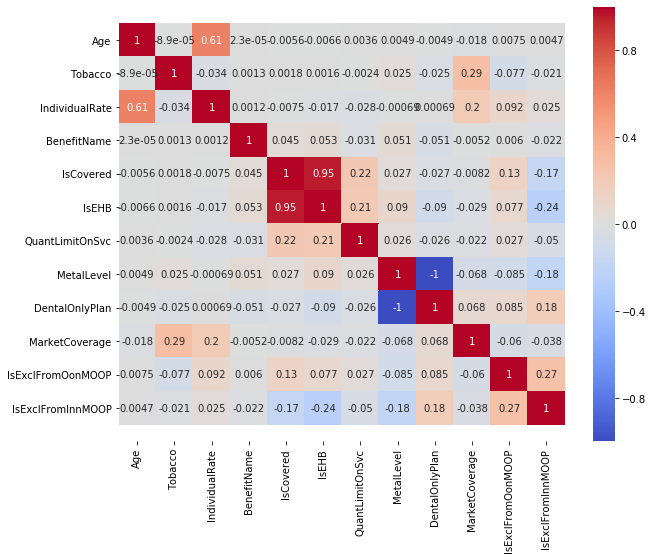

In [32]:
plt.figure(figsize=(10,8))  # on this line I just set the size of figure to 12 by 10.
ax = sns.heatmap(healthMarket.corr(), annot=True, vmin=-1, vmax=1,  cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

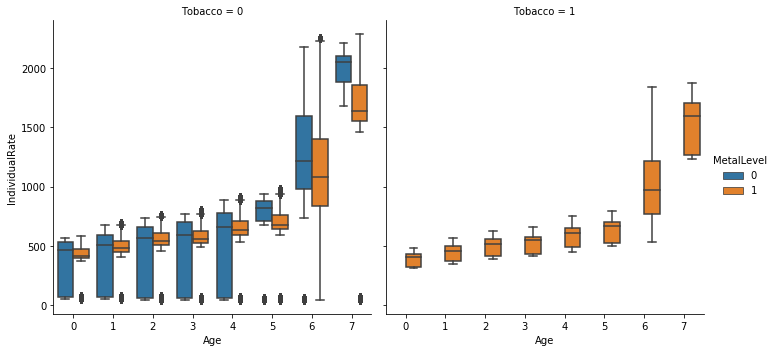

In [34]:
sns.catplot(x="Age", y="IndividualRate", hue="MetalLevel",
            col="Tobacco", kind='box', data=healthInsurance);

In [35]:
#from plotly.offline import init_notebook_mode,iplot
#import plotly.graph_objects as go
#import cufflinks as cf
#init_notebook_mode(connected=True)
#labels
#lab = healthInsurance["Age"].value_counts().keys().tolist()
#values
#val = healthInsurance["Age"].value_counts().values.tolist()
#trace = go.Pie(labels=lab, 
#                values=val, 
#                marker=dict(colors=['red']), 
#                # Seting values to 
#                hoverinfo="value"
#              )
#data = [trace]

#layout = go.Layout(title="Metal Level Distribution")
#fig = go.Figure(data = data,layout = layout)
#iplot(fig)

/Users/yagmurbali/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/yagmurbali/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


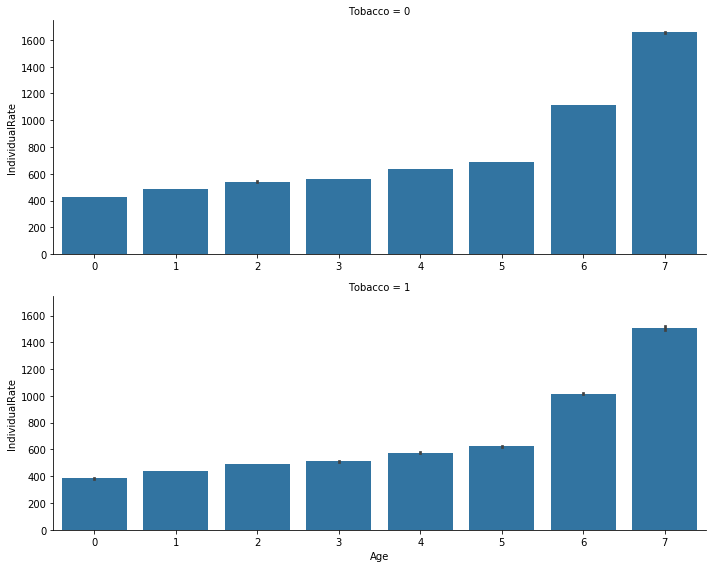

In [37]:
g = sns.FacetGrid(row='Tobacco', data=healthInsurance, size=4, aspect=2.5, sharex=False)
g.map(sns.barplot,'Age','IndividualRate')

In [38]:
healthInsurance = healthInsurance.to_csv('insurance_dc.csv')